### Import necessary libraries

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

1.Read all content of the folder (/dataset/images), Regardless of the file type and file name
in the folder using python. (use os.scandir() or os.listdir() )


In [1]:
path = r'E:\TA Filoger\Exercise\DIP\images'

In [5]:
os.listdir(path)

['a.jpg', 'b.jpg', 'c.jpg', 'd.png', 'e.jpg']

In [6]:
fileList = [] # store file name

for file in os.listdir(path):
    fileList.append(os.path.join(path,file))

In [7]:
fileList

['E:\\TA Filoger\\Exercise\\DIP\\images\\a.jpg',
 'E:\\TA Filoger\\Exercise\\DIP\\images\\b.jpg',
 'E:\\TA Filoger\\Exercise\\DIP\\images\\c.jpg',
 'E:\\TA Filoger\\Exercise\\DIP\\images\\d.png',
 'E:\\TA Filoger\\Exercise\\DIP\\images\\e.jpg']

In [8]:
os.getcwd()

'e:\\TA Filoger\\Exercise\\DIP\\Ex14'

2.Check the type of image ( Color, gray or binary)

In [12]:
def num_channel(img):
    if img.ndim == 2:
        channels = 1
    elif img.ndim == 3:
        channels = img.shape[-1]
    else:
        print('image has unexpected channel')
    return channels

In [9]:
def gray_or_binary(img):
    unique_intensities = np.unique(img)
    len_unique_intensities = len(unique_intensities)
    
    if len_unique_intensities > 2:
        type_of_image = 'Gray'
    elif len_unique_intensities == 2:
        sorted_unique_intestines = np.sort(unique_intensities)

        print(sorted_unique_intestines[0])
        print(sorted_unique_intestines[1])
        
        if sorted_unique_intestines[0] == 0 and (sorted_unique_intestines[1] == 1 or 255):
            type_of_image = 'Binary'
        else:
            type_of_image = 'Gray'
    elif len_unique_intensities ==1:
        binary_intensities = [0,1,255]
        if unique_intensities[0] in binary_intensities:
            type_of_image = 'Binary'
        else:
            type_of_image = 'Gray'
    
    return type_of_image

In [13]:
type_of_image = 'Nothing'

def find_type_of_img(imgPath):
    img = cv2.imread(imgPath,cv2.IMREAD_UNCHANGED)

    number_of_channels = num_channel(img)

    if number_of_channels == 4:
        type_of_image = 'Color image with an alpha channel'
    elif number_of_channels == 3:
        type_of_image = 'Color'
    elif number_of_channels == 2:
        type_of_image = 'Gray image with an alpha channel'
    elif number_of_channels == 1:
        type_of_image = gray_or_binary(img)
    
    return type_of_image

In [14]:
for i in fileList:
    print('Type of Image is:{}'.format(find_type_of_img(i)))

Type of Image is:Gray
Type of Image is:Color
Type of Image is:Gray
Type of Image is:Gray
Type of Image is:Gray


3.If the image is in color, convert it to grayscale, and then find the contrast of the image
( 255 - pixel intensity).

In [15]:
def inverted_img(img):
    inverted_image = (255-img)
    plt.imshow(inverted_image, cmap='gray')
    return inverted_image

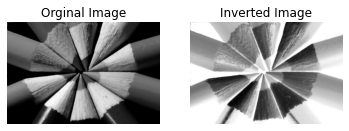

In [19]:
for i in fileList:
    if find_type_of_img(i) == 'Color':
        img = cv2.imread(i)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        plt.subplot(1,2,1)
        plt.imshow(gray,cmap='gray')
        plt.title('Orginal Image')
        plt.axis('off')
        plt.subplot(1,2,2)
        inverted_gray = inverted_img(gray)
        plt.imshow(inverted_gray,cmap ='gray')
        plt.title('Inverted Image')
        plt.axis('off')


4.If the image is in gray, convert it to binary, and then find the contrast of the image
(255 - pixel intensity) <br> 
<div style = "color:red;"> for convert gray to binary image use cv2. threshold()</div>

In [20]:
for i in fileList:
    if find_type_of_img(i) == 'Gray':
        img = cv2.imread(i)
        ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

print(thresh1)

[[[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [21]:
cv2.imshow('Binary',thresh1)
cv2.waitKey(0)

-1

In [22]:
tasvir_D = r'E:\\TA Filoger\\Exercise\\DIP\\images\\d.png'

In [23]:
img = cv2.imread(tasvir_D)
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

In [24]:
cv2.imshow('Binary',thresh1)
cv2.waitKey(0)

-1

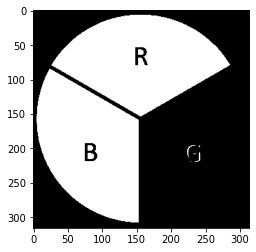

In [25]:
d_inverted = inverted_img(thresh1)

5.If the image is binary, find the contrast of the image (255 - pixel intensity)

In [26]:
gray_or_binary(thresh1)

0
255


'Binary'

In [ ]:
if find_type_of_img == 'Binary':
    d_inverted = inverted_img(thresh1)

# color 2 gray	

In [ ]:
img = cv2.imread('Name of Image')
height, width, channels = img.shape
gray_img = np.zeros((height, width), dtype=np.uint8)
#b,g,r = cv2.split(img)
for i in range(height):
    for j in range(width):
        r = img[i, j, 0]
        g = img[i, j, 1]
        b = img[i, j, 2]
        gray = 0.299*r + 0.587*g + 0.114*b
        gray_img[i, j] = gray
cv2.imshow('Gray Image', gray_img)
cv2.waitKey(0)